In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.metrics as metrics

In [26]:
df=pd.read_csv('Desktop/2nd Sem/ML/Projects 1/sgemm_product_dataset/sgemm_product.csv')
df = df.iloc[0:3000, :]

#finding the average of run time
df['avg'] = df.iloc[0: ,14:].mean(axis=1) 

#droping the run values
df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1,inplace=True) 
df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,32,16,16,8,16,32,8,1,1,0,0,1,1,49.0175
2996,16,32,16,16,8,16,32,8,1,1,0,1,0,0,120.6825
2997,16,32,16,16,8,16,32,8,1,1,0,1,0,1,62.7900
2998,16,32,16,16,8,16,32,8,1,1,0,1,1,0,102.4525


In [27]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:, 0:14]
y = df["avg"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

x_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
x_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [28]:
#cost function
def costFunction(x_train,y_train,theta):       
    error = (x_train@theta.T)-y_train
    cost=(0.5/len(x_train))*np.sum(np.power(error,2))
    return cost

In [29]:
def testing_costFunction(x_test, y_test, theta):
    x_test = scaler.fit_transform(x_test)
    one_column = np.ones((x_test.shape[0],1))
    x_test = np.concatenate((one_column, x_test), axis = 1)

In [30]:
# gradient descent algorithm
def gradientDescent(X,y,theta,iterations,alpha, check_tol ,tolerance):
    cost_train = []
    cost_test = []
    for i in range(iterations):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost = costFunction(X, y, theta)
        cost_train.append(cost)
        
        cost = costFunction(X_test, y_test, theta)
        cost_test.append(cost)
        
        if check_tol:
            if (i>0) and(abs((cost_train[i]-cost_train[i-1])/cost_train[i-1]) < tolerance).any():
                print("Gradient Descent algorithm converged after", i+1, "Iterations")
                break
            
    
    return theta,cost_train, cost_test

In [31]:
def linear_regression(X, y, alpha, iterations,check_tol=False, tolerance=10**-4):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros((1,n+1))
    y = np.array(y).reshape((y.shape[0],1))
    theta, cost_train, cost_test = gradientDescent(X,y,theta,iterations,alpha, check_tol,tolerance)
    
    return theta,cost_train, cost_test

In [32]:
def test(X_test,theta):
    return X_test@theta.T

In [70]:
def rmse_function(X, y,theta, param):
    #one_column = np.ones((X.shape[0],1))
    #data_set = np.concatenate((one_column, X), axis = 1)
    
    y_prediction = []
    for i in range(len(param)):
        y_pred = test(data_set,theta[i])
        y_prediction.append(y_pred)
    
    rmse_val = []
    for i in range(len(param)):
        rmse = np.sqrt(metrics.mean_squared_error(y, y_prediction[i]))
        rmse_val.append(rmse)
    
    return rmse_val

In [34]:
alpha_values = [0.0001, 0.001, 0.01, 0.1]

alpha_train_theta = []
alpha_train_cost = []

alpha_test_cost = []


for i in range(len(alpha_values)):
    print("\n######---- Iteration with alpha value", alpha_values[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(x_train, y_train, alpha_values[i], 10000, False)
    
    alpha_train_theta.append(theta)
    alpha_train_cost.append(trainCost)
    
    alpha_test_cost.append(testCost)


######---- Iteration with alpha value 0.0001 -----#####

######---- Iteration with alpha value 0.001 -----#####

######---- Iteration with alpha value 0.01 -----#####

######---- Iteration with alpha value 0.1 -----#####


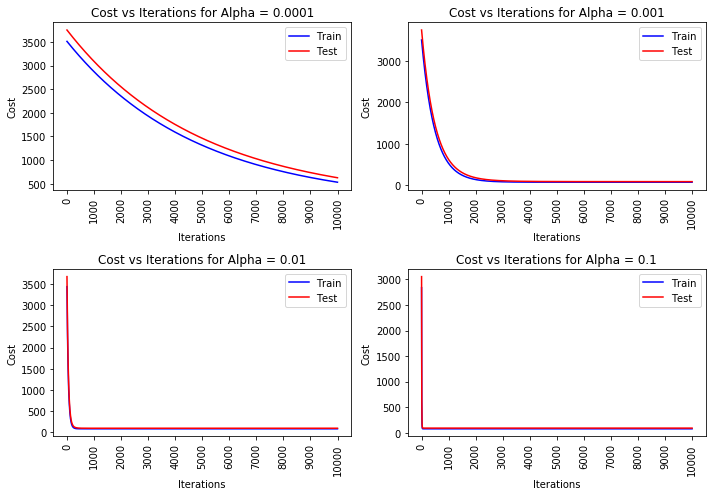

In [35]:
##### Plot for Cost vs Iterations for Each Alpha

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)

ax1.plot(range(len(alpha_train_cost[0])),alpha_train_cost[0],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[0])),alpha_test_cost[0],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.0001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

ax1 = fig.add_subplot(2,2,2)

ax1.plot(range(len(alpha_train_cost[1])),alpha_train_cost[1],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[1])),alpha_test_cost[1],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)


ax1 = fig.add_subplot(2,2,3)

ax1.plot(range(len(alpha_train_cost[2])),alpha_train_cost[2],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[2])),alpha_test_cost[2],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.01")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

ax1 = fig.add_subplot(2,2,4)

ax1.plot(range(len(alpha_train_cost[3])),alpha_train_cost[3],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[3])),alpha_test_cost[3],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.1")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

#2


In [46]:
alpha = 0.1
tol_val = [10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2]
tol_train_theta = []
tol_train_cost = []

tol_test_cost = []


for i in range(len(tol_val)):
    print("\n######---- Iteration with tolerance value", tol_val[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, alpha, 10000, True, tol_val[i])
    
    tol_train_theta.append(theta)
    tol_train_cost.append(trainCost)
    
    tol_test_cost.append(testCost)


######---- Iteration with tolerance value 1e-07 -----#####
Gradient Descent algorithm converged after 159 Iterations

######---- Iteration with tolerance value 1e-06 -----#####
Gradient Descent algorithm converged after 124 Iterations

######---- Iteration with tolerance value 1e-05 -----#####
Gradient Descent algorithm converged after 90 Iterations

######---- Iteration with tolerance value 0.0001 -----#####
Gradient Descent algorithm converged after 64 Iterations

######---- Iteration with tolerance value 0.001 -----#####
Gradient Descent algorithm converged after 47 Iterations

######---- Iteration with tolerance value 0.01 -----#####
Gradient Descent algorithm converged after 34 Iterations


In [47]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(tol_val)):
    y_pred = test(training_set,tol_train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
tol_rmse_train = []
for i in range(len(tol_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    tol_rmse_train.append(rmse)

In [48]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(tol_val)):
    y_pred = test(X_test,tol_train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
tol_rmse_test = []
for i in range(len(tol_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    tol_rmse_test.append(rmse)

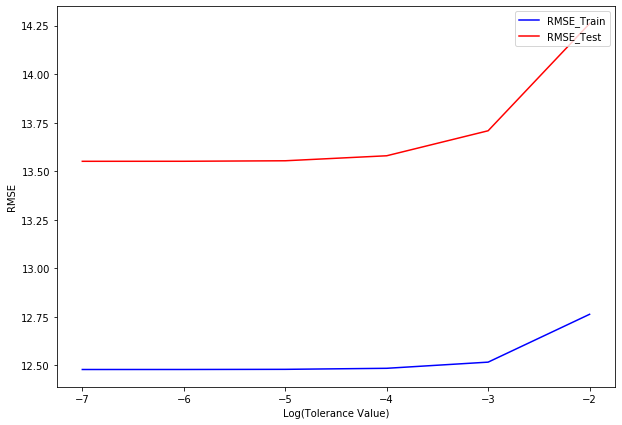

In [49]:
fig = plt.figure(figsize = (10,7))

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(tol_val),tol_rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(tol_val, ),tol_rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Tolerance Value)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [50]:
print("The best tolerance value is 10^-4")

The best tolerance value is 10^-4


In [51]:
iters = list(range(10, 200, 20))
iter_train_theta = []
iter_train_cost = []

iter_test_cost = []


for i in range(len(iters)):
    print("\n######---- Iteration = ", iters[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, 0.1, iters[i], False, 10**-4)
    
    iter_train_theta.append(theta)
    iter_train_cost.append(trainCost)
    
    iter_test_cost.append(testCost)


######---- Iteration =  10 -----#####

######---- Iteration =  30 -----#####

######---- Iteration =  50 -----#####

######---- Iteration =  70 -----#####

######---- Iteration =  90 -----#####

######---- Iteration =  110 -----#####

######---- Iteration =  130 -----#####

######---- Iteration =  150 -----#####

######---- Iteration =  170 -----#####

######---- Iteration =  190 -----#####


In [52]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(iters)):
    y_pred = test(training_set,iter_train_theta[i])
    y_prediction.append(y_pred)
    


iter_rmse_train = []
for i in range(len(iters)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    iter_rmse_train.append(rmse)

In [53]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(iters)):
    y_pred = test(X_test,iter_train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
iter_rmse_test = []
for i in range(len(iters)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    iter_rmse_test.append(rmse)

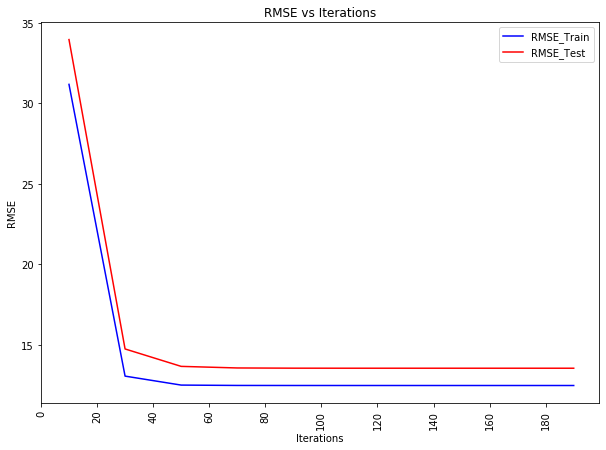

In [54]:
fig = plt.figure(figsize = (10,7))

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(iters,iter_rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(iters,iter_rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
rmse_plot.set_title("RMSE vs Iterations")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Iterations")
rmse_plot.set_xticks(list(range(0,200, 20)))
plt.xticks(rotation=90)
plt.show()

Q3

In [55]:
import random
k = random.sample(range(0, 14), 8)
print(k)
# defining feature matrix(X) and response vector(y) 
X = gpu.iloc[:,0:8]
y = gpu["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

[10, 9, 11, 7, 12, 6, 1, 2]


NameError: name 'gpu' is not defined

In [57]:
alpha = 0.1
tolerance = 10**-4
theta_8, trainCost_8, testCost_8 = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

Gradient Descent algorithm converged after 64 Iterations


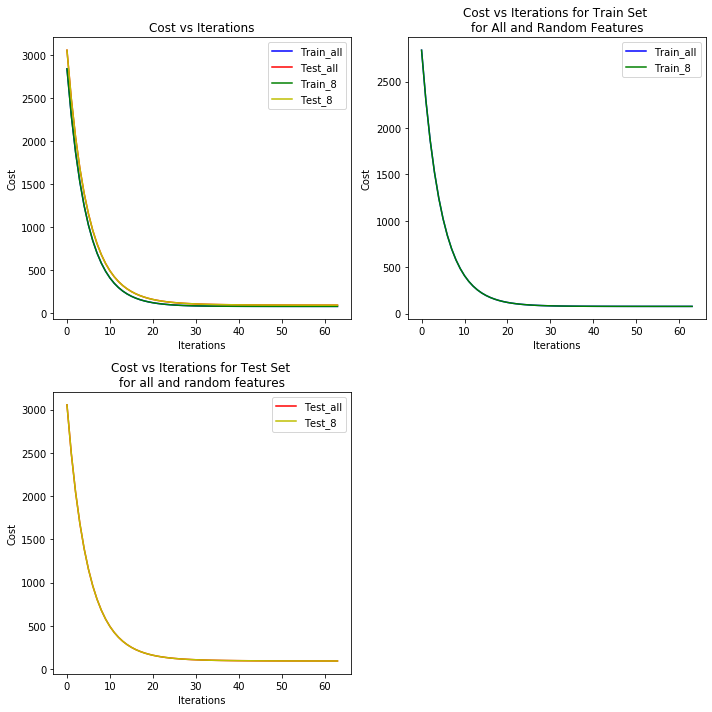

In [58]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(2,2,1)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")

ax2 = fig.add_subplot(2,2,2)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
#ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
#ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set \nfor All and Random Features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


ax2 = fig.add_subplot(2,2,3)

#ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
#ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set \nfor all and random features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


fig.tight_layout()
plt.show()

In [59]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred8 = test(training_set,theta_8)
rmse_train8 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred8))

In [60]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred8 = test(X_test,theta_8)
rmse_test8 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred8))

In [61]:
print(rmse_train8)
print(rmse_test8)
print(tol_rmse_train[3])
print(tol_rmse_test[3])

12.48449000247132
13.579302338831223
12.48449000247132
13.579302338831223


Q4

In [63]:
best_features = [0,1,2,3,4,7,12,13]
df.columns[best_features]

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'KWI', 'SA', 'SB'], dtype='object')

In [65]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:,best_features]
y = df["avg"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [66]:
alpha = 0.1
tolerance = 10**-4
theta_best, trainCost_best, testCost_best = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

Gradient Descent algorithm converged after 64 Iterations


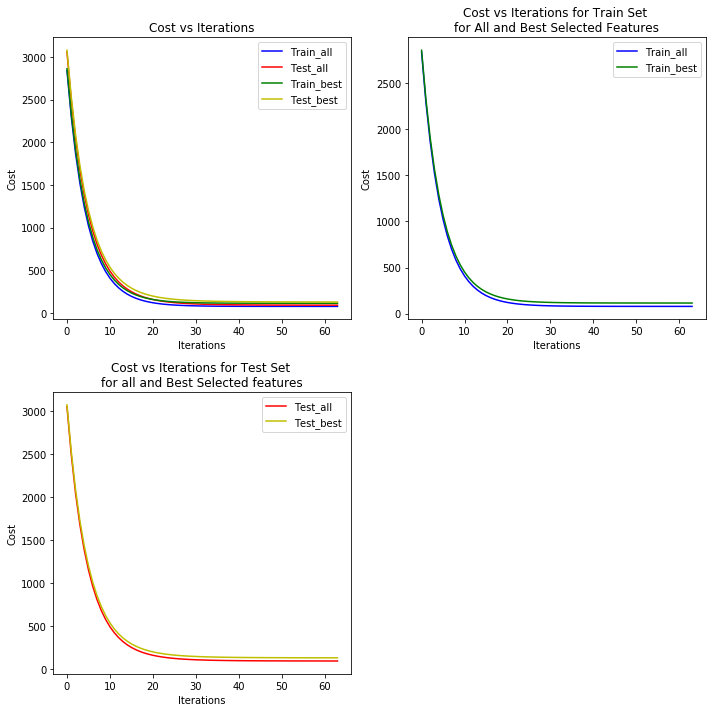

In [67]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(2,2,1)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_best)),trainCost_best,'-g', label="Train_best")
ax2.plot(range(len(testCost_best)),testCost_best,'-y', label="Test_best")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")

ax2 = fig.add_subplot(2,2,2)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
#ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_best)),trainCost_best,'-g', label="Train_best")
#ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set \nfor All and Best Selected Features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


ax2 = fig.add_subplot(2,2,3)

#ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
#ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
ax2.plot(range(len(testCost_best)),testCost_best,'-y', label="Test_best")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set \nfor all and Best Selected features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


fig.tight_layout()
plt.show()

In [75]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred8))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred8))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred8)))
print('R-squared:', metrics.r2_score(y_test, y_test_pred8))

Mean Absolute Error: 10.876356221310319
Mean Squared Error: 184.39745200938714
Root Mean Squared Error: 13.579302338831223
R-squared: 0.7814837358519207


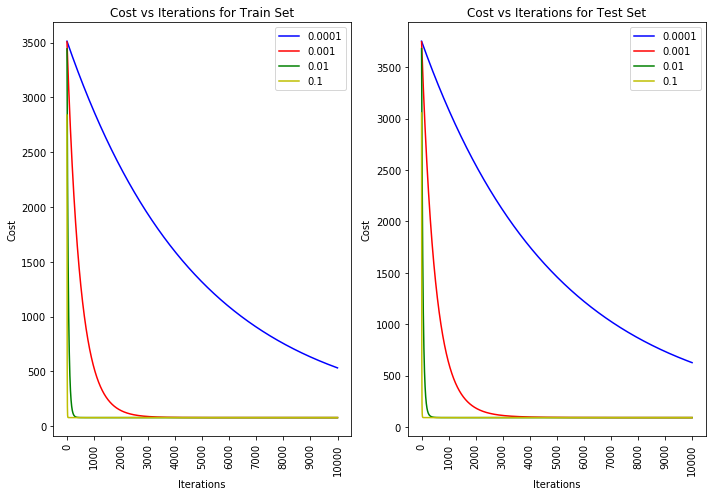

In [36]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,7))

ax2 = fig.add_subplot(1,2,1)

ax2.plot(range(len(alpha_train_cost[0])),alpha_train_cost[0],'-b', label="0.0001")
ax2.plot(range(len(alpha_train_cost[1])),alpha_train_cost[1],'-r', label="0.001")
ax2.plot(range(len(alpha_train_cost[2])),alpha_train_cost[2],'-g', label="0.01")
ax2.plot(range(len(alpha_train_cost[3])),alpha_train_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
ax2.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)


ax2 = fig.add_subplot(1,2,2)

ax2.plot(range(len(alpha_test_cost[0])),alpha_test_cost[0],'-b', label="0.0001")
ax2.plot(range(len(alpha_test_cost[1])),alpha_test_cost[1],'-r', label="0.001")
ax2.plot(range(len(alpha_test_cost[2])),alpha_test_cost[2],'-g', label="0.01")
ax2.plot(range(len(alpha_test_cost[3])),alpha_test_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
ax2.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

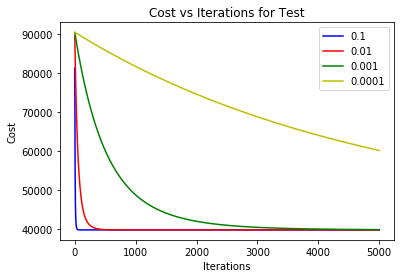

In [94]:
fig = plt.figure()

ax2 = fig.add_subplot(1,1,1)

ax2.plot(range(len(b[0])),b[0],'-b', label="0.1")
ax2.plot(range(len(b[1])),b[1],'-r', label="0.01")
ax2.plot(range(len(b[2])),b[2],'-g', label="0.001")
ax2.plot(range(len(b[3])),b[3],'-y', label="0.0001")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
plt.show()

In [98]:
alpha

[0.1, 0.01, 0.001, 0.0001]

In [117]:
# Prediction for Train and RMSE Train

#one_column = np.ones((X_train.shape[0],1))
#training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(alpha)):
    y_pred = test(X_std,c[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_train = []
for i in range(len(alpha)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    rmse_train.append(rmse)

In [118]:
rmse_train

[284.67797799736934, 284.67797799736934, 284.9403899365425, 349.3176704855508]

In [121]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(alpha)):
    y_pred = test(X_test,c[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_test = []
for i in range(len(alpha)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    rmse_test.append(rmse)

In [122]:
rmse_test

[281.90795910908327, 281.9079591090861, 282.1640428278979, 346.7240661714565]

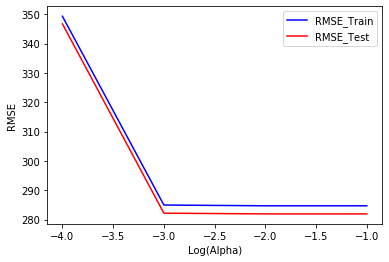

In [124]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(alpha),rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(alpha, ),rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Alpha)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [156]:
X_train

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
116805,64,128,16,8,16,32,32,8,1,1,0,1,0,1
168751,128,32,32,32,16,32,16,2,1,1,1,1,1,1
91812,64,64,16,8,32,16,16,2,1,1,0,1,0,0
175331,128,64,16,8,32,16,16,8,8,1,0,0,1,1
40877,32,64,32,8,16,16,32,8,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,32,128,32,32,8,32,32,2,1,4,1,1,1,1
77655,64,32,16,16,32,32,32,2,2,1,0,1,1,1
210755,128,128,16,16,8,8,32,8,4,1,0,0,1,1
56088,32,128,32,8,8,16,16,8,2,2,1,0,0,0


In [186]:
print("The best alpha is 0.001")
toler_val = [10**-8, 10**-7, 10**-6, 10**-5, 10**-4]
train_theta = []
train_cost = []
test_cost = []


for i in range(len(toler_val)):
    print("\n######---- Iteration with tolerance value", toler_val[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, 0.001, 10000, True, toler_val[i])
    
    train_theta.append(theta)
    train_cost.append(trainCost)
    
    test_cost.append(testCost)

The best alpha is 0.001

######---- Iteration with tolerance value 1e-08 -----#####
Gradient Descent algorithm converged after 9997 Iterations

######---- Iteration with tolerance value 1e-07 -----#####
Gradient Descent algorithm converged after 7805 Iterations

######---- Iteration with tolerance value 1e-06 -----#####
Gradient Descent algorithm converged after 5625 Iterations

######---- Iteration with tolerance value 1e-05 -----#####
Gradient Descent algorithm converged after 3523 Iterations

######---- Iteration with tolerance value 0.0001 -----#####
Gradient Descent algorithm converged after 1711 Iterations


In [188]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(toler_val)):
    y_pred = test(training_set,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_train = []
for i in range(len(toler_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    rmse_train.append(rmse)

In [189]:
rmse_train

[284.67933280659116,
 284.691507625731,
 284.8124470684015,
 285.9672066927597,
 295.8506877510251]

In [190]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(toler_val)):
    y_pred = test(X_test,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_test = []
for i in range(len(toler_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    rmse_test.append(rmse)

In [191]:
rmse_test

[281.90895011932287,
 281.91995418933936,
 282.03736843822793,
 283.1888800671816,
 293.11292250667736]

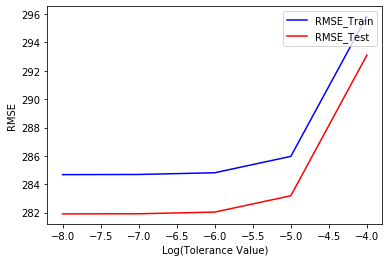

In [194]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(toler_val),rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(toler_val, ),rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Tolerance Value)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [195]:
iters_2 = list(range(1000, 11000, 1000))
train_theta = []
train_cost = []

test_cost = []


for i in range(len(iters_2)):
    print("\n######---- Iteration = ", iters_2[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, 0.001, iters_2[i])
    
    train_theta.append(theta)
    train_cost.append(trainCost)
    
    test_cost.append(testCost)


######---- Iteration =  1000 -----#####

######---- Iteration =  2000 -----#####

######---- Iteration =  3000 -----#####

######---- Iteration =  4000 -----#####

######---- Iteration =  5000 -----#####

######---- Iteration =  6000 -----#####

######---- Iteration =  7000 -----#####

######---- Iteration =  8000 -----#####

######---- Iteration =  9000 -----#####

######---- Iteration =  10000 -----#####


In [197]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(iters_2)):
    y_pred = test(training_set,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_train = []
for i in range(len(iters_2)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    rmse_train.append(rmse)

In [198]:
rmse_train

[314.90570188373385,
 292.3635002677992,
 286.9983408650529,
 285.4421143918503,
 284.9389886732254,
 284.7684442532405,
 284.70951793171446,
 284.6890012254649,
 284.68183512822515,
 284.67932854909327]

In [199]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(iters_2)):
    y_pred = test(X_test,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_test = []
for i in range(len(iters_2)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    rmse_test.append(rmse)

In [200]:
rmse_test

[312.23342772025603,
 289.61071558254497,
 284.22273396999,
 282.66352764971555,
 282.1623683537665,
 281.9942042258305,
 281.9370324863082,
 281.91762073163807,
 281.91109755276744,
 281.9089466325068]

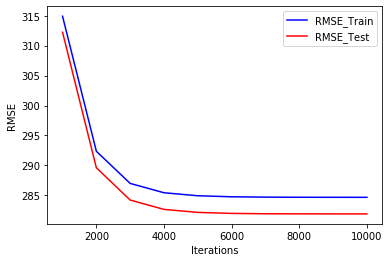

In [202]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(iters_2,rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(iters_2,rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Iterations")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [204]:
corr = df.iloc[:,0:10].corr().round(4)
corr.style.background_gradient(cmap='BuPu', axis= None).set_precision(2)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
MWG,1,0.0006,0.0093,0.11,-0.0086,0.16,0.015,0,0.35,-0.0008
NWG,0.0006,1,0.0093,-0.0086,0.11,0.015,0.16,0,-0.0008,0.35
KWG,0.0093,0.0093,1,0.15,0.15,-0.035,-0.035,-0,-0.012,-0.012
MDIMC,0.11,-0.0086,0.15,1,-0.21,0.2,0.085,-0,-0.13,0.011
NDIMC,-0.0086,0.11,0.15,-0.21,1,0.085,0.2,-0,0.011,-0.13
MDIMA,0.16,0.015,-0.035,0.2,0.085,1,0.088,-0,-0.2,-0.019
NDIMB,0.015,0.16,-0.035,0.085,0.2,0.088,1,-0,-0.019,-0.2
KWI,0,0,-0,-0,-0,-0,-0,1,-0,-0
VWM,0.35,-0.0008,-0.012,-0.13,0.011,-0.2,-0.019,-0,1,0.0012
VWN,-0.0008,0.35,-0.012,0.011,-0.13,-0.019,-0.2,-0,0.0012,1


In [ ]:
import random
k = random.sample(range(0, 15), 8)

# defining feature matrix(X) and response vector(y) 
X = gpu.iloc[:,0:8]
y = gpu["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [ ]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")

In [ ]:
alpha = 0.1
tolerance = 10**-4
theta_8, trainCost_8, testCost_8 = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

In [ ]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred8 = test(training_set,theta_8)
rmse_train8 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred8))

In [ ]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred8 = test(X_test,theta_8)
rmse_test8 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred8))

In [ ]:
print(rmse_train8)
print(rmse_test8)

In [ ]:
best_features = [0,1,2,3,4,7,12,13]

In [ ]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:,best_features]
y = df["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [ ]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")

In [ ]:
alpha = 0.1
tolerance = 10**-4
theta_best, trainCost_best, testCost_best = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

In [ ]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred_best = test(training_set,theta_best)
rmse_train_best = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_best))

In [ ]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred_best = test(X_test,theta_8)
rmse_test_best = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_best))

In [ ]:
print(rmse_test_best)
print(rmse_train_best)